In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob


In [2]:
def average_payoff(t_fraction, theta):
    return theta * (1 - 2 * t_fraction) + 8 * (t_fraction + t_fraction * t_fraction)

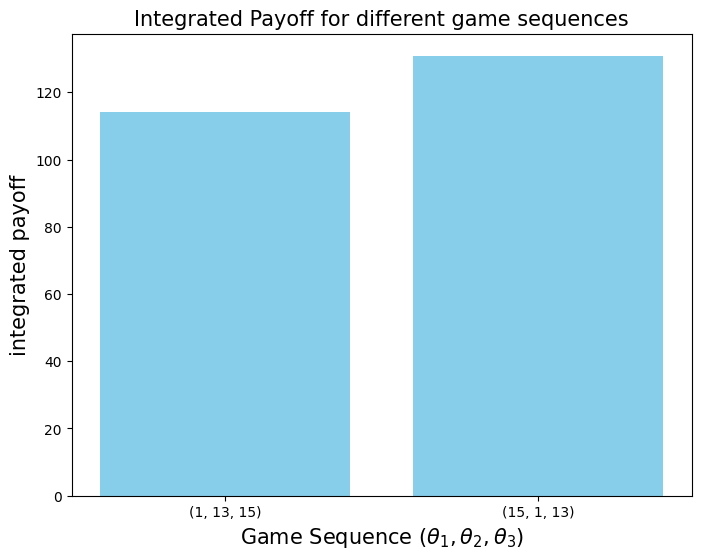

In [14]:
# Data for bar plot
x_labels = ["(1, 13, 15)", "(15, 1, 13)"]  # seq thetas
# y_values = [1120.22131048, 1264.0672596]  # integrated payoff
y_values = [114.17322207999999, 130.88488647999998]

# Create bar plot with positions
x_positions = range(len(y_values))
fig = plt.figure(figsize=(8, 6))
plt.bar(x_positions, y_values, color='skyblue')
plt.xticks(x_positions, x_labels)
plt.xlabel("Game Sequence ($\\theta_1, \\theta_2, \\theta_3$)", fontsize=15)
plt.ylabel("integrated payoff", fontsize=15)
plt.title("Integrated Payoff for different game sequences", fontsize=15)
plt.savefig("../notebooks/integrated_payoff.png", dpi=300)
plt.show()

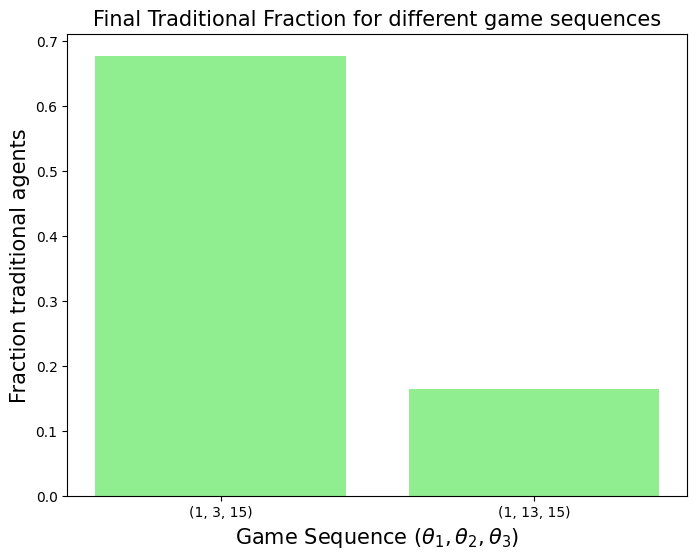

In [15]:
# Data for final Traditional (T) fraction plot
x_labels = ["(1, 3, 15)", "(1, 13, 15)"]  # seq thetas
# y_values = [0.64876, 0.15432]  # final T fraction for last theta (15)
y_values = [0.67762, 0.16422]

# Create bar plot with positions
x_positions = range(len(y_values))
plt.figure(figsize=(8, 6))
plt.bar(x_positions, y_values, color='lightgreen')
plt.xticks(x_positions, x_labels)
plt.xlabel("Game Sequence ($\\theta_1, \\theta_2, \\theta_3$)", fontsize=15)
plt.ylabel("Fraction traditional agents", fontsize=15)
plt.title("Final Traditional Fraction for different game sequences", fontsize=15)
plt.savefig("../notebooks/final_traditional_fraction.png", dpi=300)
plt.show()

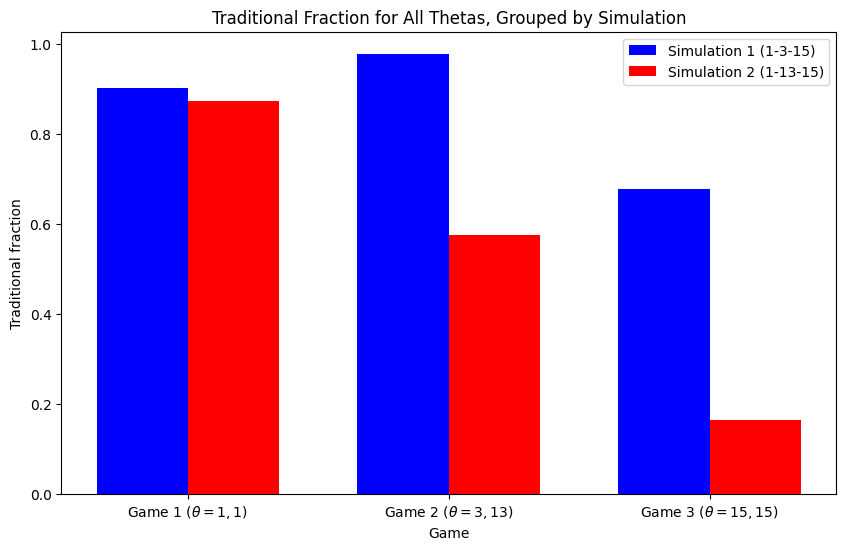

In [16]:
# Data for all thetas, grouped by simulation

sim1_thetas = [1, 3, 15]  # Simulation 1-3-15
sim2_thetas = [1, 13, 15]  # Simulation 1-13-15

# T fractions
# sim1_fracs = {'1': 0.8795999999999999, '3': 0.9604299999999999, '15': 0.64876}
# sim2_fracs = {'1': 0.8879900000000001, '13': 0.59372, '15': 0.15432}

sim1_fracs = {'1': 0.9017700000000001, '3': 0.97854, '15': 0.67762}
sim2_fracs = {'1': 0.87426, '13': 0.57635, '15': 0.16422}

# Positions for bars
x_positions = [0, 1, 2]  # for 1,3,13,15
width = 0.35

plt.figure(figsize=(10, 6))

for i, theta in enumerate(sim1_thetas):
    plt.bar(x_positions[i] - width/2, sim1_fracs[str(theta)], width, color='blue', label='Simulation 1 (1-3-15)' if i == 0 else "")

for i, theta in enumerate(sim2_thetas):
    plt.bar(x_positions[i] + width/2, sim2_fracs[str(theta)], width, color='red', label='Simulation 2 (1-13-15)' if i == 0 else "")

plt.xticks(x_positions, ['Game 1 ($\\theta = 1, 1$)', 'Game 2 ($\\theta = 3, 13$)', 'Game 3 ($\\theta = 15, 15$)'])
plt.xlabel("Game")
plt.ylabel("Traditional fraction")
plt.title("Traditional Fraction for All Thetas, Grouped by Simulation")
plt.legend()
plt.savefig("../notebooks/all_thetas_traditional_fraction.png", dpi=300)
plt.show()

In [8]:
fnames = glob.glob('../results/run_*/*.pkl')
results = []
for fname in fnames:
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    results.append(data)

print(len(results))

3


In [9]:
result_index = 0
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)

1
13
15
114.17322207999999


In [10]:
result_index = 1
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)

1
3
15
124.86850351999999


In [11]:
result_index = 2
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)

15
1
13
130.88488647999998


In [7]:
result_index = 3
integrated_payoff = 0
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
print(integrated_payoff)



IndexError: list index out of range

In [26]:
result_index = 1

for theta in results[result_index]:
    print(theta)
    integrated_payoff = 0
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff += np.sum(np.mean(average_payoff_ensemble, axis=0))
    print(integrated_payoff)

1
475.43997879999995
13
222.61441527999997
15
422.1669164


In [54]:
result_index = 2
integrated_payoff = []
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff.extend(np.mean(average_payoff_ensemble, axis=0))


15
1
13


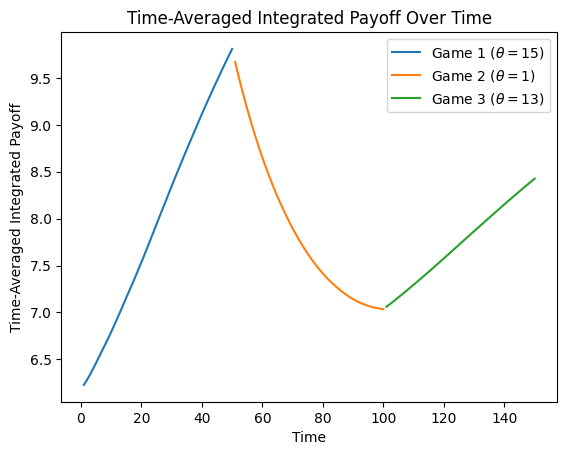

[9.81069681 7.03519611 8.42711506]


In [55]:
cumulative_integrated_payoff = np.cumsum(integrated_payoff)
time = np.arange(1, len(cumulative_integrated_payoff) + 1)
time_averaged_integrated_payoff = cumulative_integrated_payoff / time

thetas = [15, 1, 13]
for i in range(3):
    plt.plot(time[i * 50:(i + 1) * 50], time_averaged_integrated_payoff[i * 50: (i + 1) * 50], label=f'Game {i + 1} ($\\theta = {thetas[i]}$)')

plt.xlabel('Time')
plt.ylabel('Time-Averaged Integrated Payoff')
plt.title('Time-Averaged Integrated Payoff Over Time')
plt.legend()
plt.savefig('time_averaged_integrated_payoff_sim_2.png')
plt.show()
print(time_averaged_integrated_payoff[[49, 99, 149]])

In [39]:
result_index = 1
integrated_payoff = []
for theta in results[result_index]:
    print(theta)
    average_payoff_ensemble = []
    for ensemble in results[result_index][theta]:

        strategies = np.array(results[result_index][theta][ensemble]['strategies'])
        mapped_matrix = np.where(strategies == 'T', 1, 0)
        fraction_t = np.mean(mapped_matrix, axis=0)
        average_payoff_ensemble.append(average_payoff(fraction_t, theta))

    average_payoff_ensemble = np.array(average_payoff_ensemble)
    integrated_payoff.extend(np.mean(average_payoff_ensemble, axis=0))


1
13
15


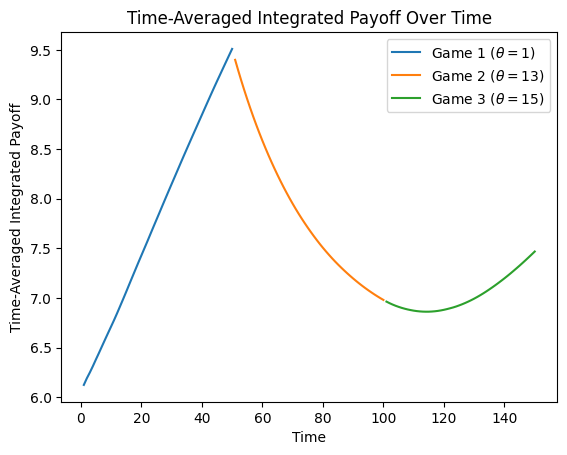

[9.50879958 6.98054394 7.46814207]


In [52]:
cumulative_integrated_payoff = np.cumsum(integrated_payoff)
time = np.arange(1, len(cumulative_integrated_payoff) + 1)
time_averaged_integrated_payoff = cumulative_integrated_payoff / time

thetas = [1, 13, 15]
for i in range(3):
    plt.plot(time[i * 50:(i + 1) * 50], time_averaged_integrated_payoff[i * 50: (i + 1) * 50], label=f'Game {i + 1} ($\\theta = {thetas[i]}$)')

plt.xlabel('Time')
plt.ylabel('Time-Averaged Integrated Payoff')
plt.title('Time-Averaged Integrated Payoff Over Time')
plt.legend()
plt.savefig('time_averaged_integrated_payoff_sim_1.png')
plt.show()
print(time_averaged_integrated_payoff[[49, 99, 149]])

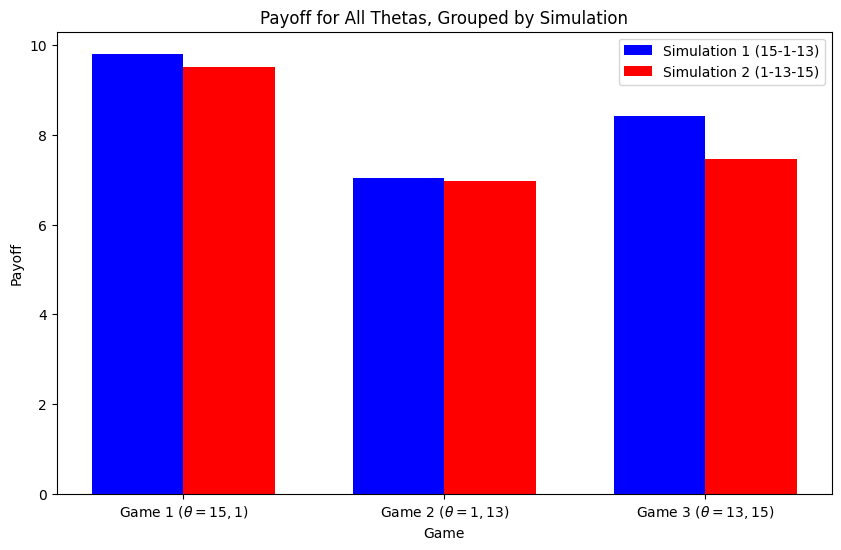

In [59]:
# Data for all thetas, grouped by simulation

sim1_thetas = [15, 1, 13]  # Simulation 15-1-13
sim2_thetas = [1, 13, 15]  # Simulation 1-13-15

sim1_payoffs = {'15': 9.81069681, '1': 7.03519611, '13': 8.42711506}  # Simulation 15-1-13
sim2_payoffs = {'1': 9.50879958, '13': 6.98054394, '15': 7.46814207}  # Simulation 1-13-15
# Positions for bars
x_positions = [0, 1, 2]  # for 1,3,13,15
width = 0.35

plt.figure(figsize=(10, 6))

for i, theta in enumerate(sim1_thetas):
    plt.bar(x_positions[i] - width/2, sim1_payoffs[str(theta)], width, color='blue', label='Simulation 1 (15-1-13)' if i == 0 else "")

for i, theta in enumerate(sim2_thetas):
    plt.bar(x_positions[i] + width/2, sim2_payoffs[str(theta)], width, color='red', label='Simulation 2 (1-13-15)' if i == 0 else "")

plt.xticks(x_positions, ['Game 1 ($\\theta = 15, 1$)', 'Game 2 ($\\theta = 1, 13$)', 'Game 3 ($\\theta = 13, 15$)'])
plt.xlabel("Game")
plt.ylabel("Payoff")
plt.title("Payoff for All Thetas, Grouped by Simulation")
plt.legend()
plt.savefig("../notebooks/expected_payoff.png", dpi=300)
plt.show()